# Time series analysis (Pandas)

Nikolay Koldunov

koldunovn@gmail.com

================

Here I am going to show just some basic [pandas](http://pandas.pydata.org/) stuff for time series analysis, as I think for the Earth Scientists it's the most interesting topic. If you find this small tutorial useful, I encourage you to watch [this video](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas), where Wes McKinney give extensive introduction to the time series data analysis with pandas.

On the official website you can find explanation of what problems pandas solve in general, but I can tell you what problem pandas solve for me. It makes analysis and visualisation of 1D data, especially time series, MUCH faster. Before pandas working with time series in python was a pain for me, now it's fun. Ease of use stimulate in-depth exploration of the data: why wouldn't you make some additional analysis if it's just one line of code? Hope you will also find this great tool helpful and useful. So, let's begin.

As an example we are going to use time series of [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data sets.

## Module import

First we have to import necessary modules:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better

In [2]:
pd.__version__

u'0.17.0'

## Loading data

Now, when we are done with preparations, let's get some data.

Pandas has very good IO capabilities, but we not going to use them in this tutorial in order to keep things simple. For now we open the file simply with numpy loadtxt:

In [5]:
temp = np.loadtxt('../Week03/Ham_3column.txt')

Every line in the file consist of three elements: year, month, value:

In [6]:
temp[-1]

array([ 2014.,     8.,    31.,   184.])

And here is the shape of our array (note that shape of the file might differ in your case, since data updated monthly):

In [7]:
temp.shape

(45168, 4)

## Time Series

We would like to convert this data in to time series, that can be manipulated naturally and easily. First step, that we have to do is to create the range of dates for our time series. From the file it is clear, that record starts at January 1891 and ends at August 2014 (at the time I am writing this, of course).  Frequency of the data is one day (freq='D'). 

In [8]:
dates = pd.date_range('1891-01-01', '2014-08-31', freq='D')

As you see syntax is quite simple, and this is one of the reasons why I love Pandas so much :) You can check if the range of dates is properly generated:

In [9]:
dates

DatetimeIndex(['1891-01-01', '1891-01-02', '1891-01-03', '1891-01-04',
               '1891-01-05', '1891-01-06', '1891-01-07', '1891-01-08',
               '1891-01-09', '1891-01-10',
               ...
               '2014-08-22', '2014-08-23', '2014-08-24', '2014-08-25',
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31'],
              dtype='datetime64[ns]', length=45168, freq='D')

Now we are ready to create our first time series. Dates from the *dates* variable will be our index, and `temp` values will be our, hm... values:

In [10]:
ham = pd.Series(temp[:,3]/10., index=dates)

In [11]:
ham

1891-01-01 00:00:00    -7.2
1891-01-02 00:00:00    -4.3
1891-01-03 00:00:00    -3.2
1891-01-04 00:00:00     1.2
1891-01-05 00:00:00    -2.9
1891-01-06 00:00:00    -4.3
1891-01-07 00:00:00    -3.7
                       ... 
2014-08-25             16.7
2014-08-26             19.0
2014-08-27             21.9
2014-08-28             23.4
2014-08-29             21.6
2014-08-30             19.8
2014-08-31             18.4
Freq: D, dtype: float64

Now we can plot complete time series:

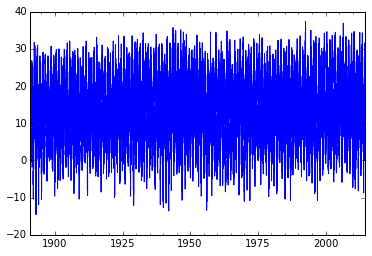

In [12]:
ham.plot()

or its part:

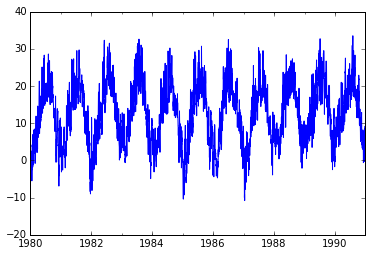

In [13]:
ham['1980':'1990'].plot()

or even smaller part:

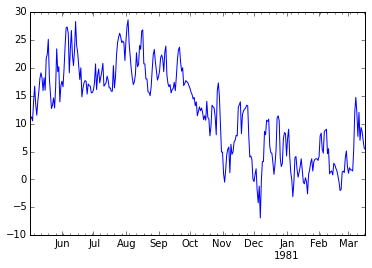

In [15]:
ham['1980-05-02':'1981-03-17'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By number: 

In [16]:
ham[120]

18.899999999999999

or by index (date in our case):

In [17]:
ham['1960-01']

1960-01-01    11.0
1960-01-02     9.2
1960-01-03     7.5
1960-01-04     5.2
1960-01-05     9.8
1960-01-06     7.1
1960-01-07     7.5
              ... 
1960-01-25     9.4
1960-01-26     7.5
1960-01-27     5.1
1960-01-28     4.8
1960-01-29     7.0
1960-01-30     2.0
1960-01-31    -2.4
Freq: D, dtype: float64

And what if we choose only one year?

In [18]:
ham['1960']

1960-01-01    11.0
1960-01-02     9.2
1960-01-03     7.5
1960-01-04     5.2
1960-01-05     9.8
1960-01-06     7.1
1960-01-07     7.5
              ... 
1960-12-25     3.0
1960-12-26     7.0
1960-12-27     5.4
1960-12-28     3.9
1960-12-29     1.5
1960-12-30     0.0
1960-12-31     1.8
Freq: D, dtype: float64

Isn't that great? :)

##Exercise

What was temperature in Hampurg at your burthsday?

## One bonus example :)

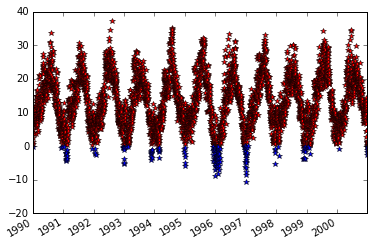

In [28]:
ham[ham > 0]['1990':'2000'].plot(style='r*')
ham[ham < 0]['1990':'2000'].plot(style='b*')

##Exercise

- plot all positive temperatures (red stars) and negative temperatires (blue stars)
- limit this plot by 1990-2000 period

## Data Frame

Now let's make live a bit more interesting and get more data. This will be TMIN time series.

We use pandas function `read_csv` to parse dates and create Data Frame

In [30]:
hamm = pd.read_csv('Ham_tmin.txt', parse_dates=True, index_col=0, names=['Time','tmin'])

In [31]:
hamm

,tmin
Time,
1891-01-01 00:00:00,-132
1891-01-02 00:00:00,-119
1891-01-03 00:00:00,-116
1891-01-04 00:00:00,-108
1891-01-05 00:00:00,-37
1891-01-06 00:00:00,-58
1891-01-07 00:00:00,-58
...,...
2014-08-25,56


In [32]:
type(hamm)

pandas.core.frame.DataFrame

Time period is the same:

In [33]:
hamm.index

DatetimeIndex(['1891-01-01', '1891-01-02', '1891-01-03', '1891-01-04',
               '1891-01-05', '1891-01-06', '1891-01-07', '1891-01-08',
               '1891-01-09', '1891-01-10',
               ...
               '2014-08-22', '2014-08-23', '2014-08-24', '2014-08-25',
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31'],
              dtype='datetime64[ns]', name=u'Time', length=45168, freq=None)

Now we create Data Frame, that will contain both TMAX and TMIN data. It is sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [34]:
tmp = pd.DataFrame({'TMAX':ham, 'TMIN':hamm.tmin/10})

In [35]:
tmp

,TMAX,TMIN
1891-01-01 00:00:00,-7.2,-13.2
1891-01-02 00:00:00,-4.3,-11.9
1891-01-03 00:00:00,-3.2,-11.6
1891-01-04 00:00:00,1.2,-10.8
1891-01-05 00:00:00,-2.9,-3.7
1891-01-06 00:00:00,-4.3,-5.8
1891-01-07 00:00:00,-3.7,-5.8
...,...,...
2014-08-25,16.7,5.6
2014-08-26,19.0,3.8


One can plot the data straight away:

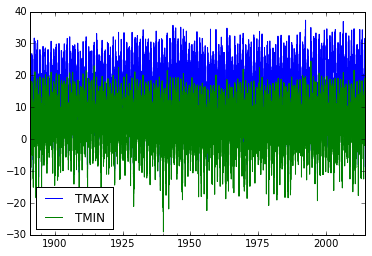

In [36]:
tmp.plot()

Or have a look at the first several rows:

In [37]:
tmp.head()

,TMAX,TMIN
1891-01-01 00:00:00,-7.2,-13.2
1891-01-02 00:00:00,-4.3,-11.9
1891-01-03 00:00:00,-3.2,-11.6
1891-01-04 00:00:00,1.2,-10.8
1891-01-05 00:00:00,-2.9,-3.7


We can reference each column by its name:

In [38]:
tmp['TMIN']

1891-01-01 00:00:00   -13.2
1891-01-02 00:00:00   -11.9
1891-01-03 00:00:00   -11.6
1891-01-04 00:00:00   -10.8
1891-01-05 00:00:00    -3.7
1891-01-06 00:00:00    -5.8
1891-01-07 00:00:00    -5.8
                       ... 
2014-08-25              5.6
2014-08-26              3.8
2014-08-27              6.6
2014-08-28              6.7
2014-08-29             13.2
2014-08-30             12.8
2014-08-31             10.3
Freq: D, Name: TMIN, dtype: float64

or as method of the Data Frame variable (if name of the variable is a valid python name):

In [ ]:
tmp.TMIN

We can simply add column to the Data Frame:

In [39]:
tmp['Diff'] = tmp['TMAX'] - tmp['TMIN']
tmp.head()

,TMAX,TMIN,Diff
1891-01-01 00:00:00,-7.2,-13.2,6.0
1891-01-02 00:00:00,-4.3,-11.9,7.6
1891-01-03 00:00:00,-3.2,-11.6,8.4
1891-01-04 00:00:00,1.2,-10.8,12.0
1891-01-05 00:00:00,-2.9,-3.7,0.8


##Exercise
Find and plot all differences that are larger than 20

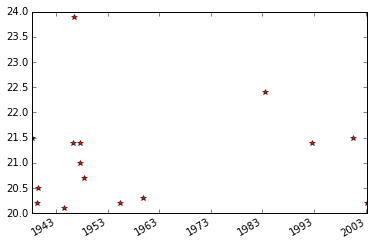

In [44]:
tmp['Diff'][tmp['Diff']>20].plot(style='r*')

And delete it:

In [45]:
del tmp['Diff']
tmp.tail()

,TMAX,TMIN
2014-08-27,21.9,6.6
2014-08-28,23.4,6.7
2014-08-29,21.6,13.2
2014-08-30,19.8,12.8
2014-08-31,18.4,10.3


Slicing will also work:

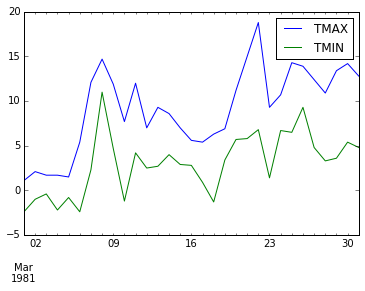

In [47]:
tmp['1981-03'].plot()

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [48]:
tmp.mean()

TMAX    12.488780
TMIN     5.292729
dtype: float64

In [49]:
tmp.max()

TMAX    37.3
TMIN    24.4
dtype: float64

In [50]:
tmp.min()

TMAX   -14.6
TMIN   -29.1
dtype: float64

You can also do it row-wise:

In [57]:
tmp.mean(1)

1891-01-01 00:00:00   -10.20
1891-01-02 00:00:00    -8.10
1891-01-03 00:00:00    -7.40
1891-01-04 00:00:00    -4.80
1891-01-05 00:00:00    -3.30
1891-01-06 00:00:00    -5.05
1891-01-07 00:00:00    -4.75
                       ...  
2014-08-25             11.15
2014-08-26             11.40
2014-08-27             14.25
2014-08-28             15.05
2014-08-29             17.40
2014-08-30             16.30
2014-08-31             14.35
Freq: D, dtype: float64

Or get everything at once:

In [52]:
tmp.describe()

,TMAX,TMIN
count,45168.000000,45168.000000
mean,12.488780,5.292729
std,8.053677,6.432232
min,-14.600000,-29.100000
25%,6.300000,0.800000
50%,12.500000,5.400000
75%,18.700000,10.400000
max,37.300000,24.400000


By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [58]:
tmp.corr()

,TMAX,TMIN
TMAX,1.000000,0.894751
TMIN,0.894751,1.000000


##Exercise
Find mean of all temperatures larger than 5

In [73]:
tmp[tmp>5].mean()

TMAX    15.311054
TMIN    10.379256
dtype: float64

## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates monthly ('M'):

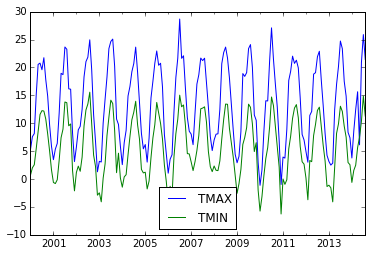

In [79]:
tmp_mm = tmp.resample("M")
tmp_mm['2000':].plot()

median:

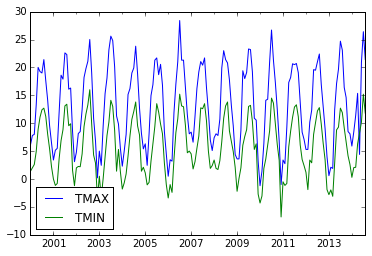

In [80]:
tmp_mm = tmp.resample("M", how='median')
tmp_mm['2000':].plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

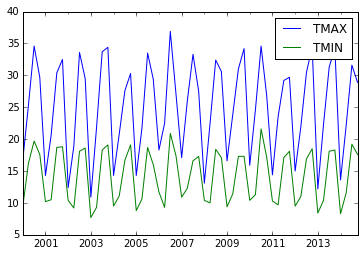

In [81]:
tmp_mm = tmp.resample("3M", how=np.max)
tmp_mm['2000':].plot()

You can specify several functions at once as a list:

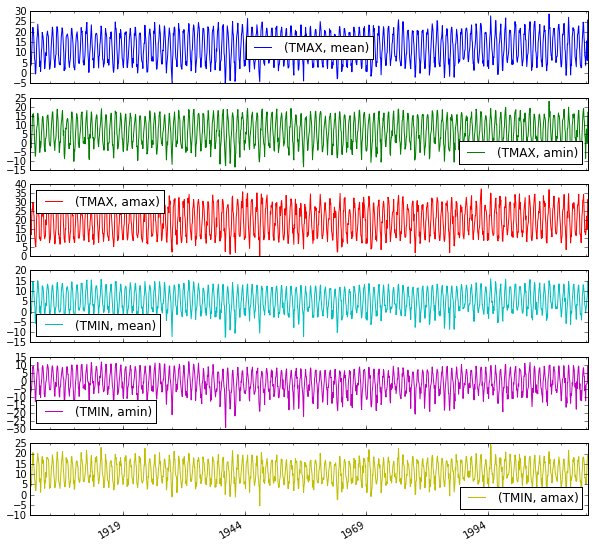

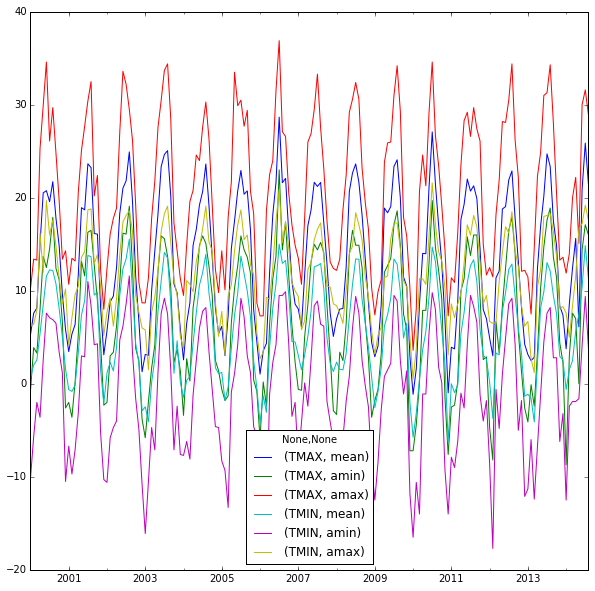

In [82]:
tmp_mm = tmp.resample("M", how=['mean', np.min, np.max])
tmp_mm['1900':'2020'].plot(subplots=True, figsize=(10,10))
tmp_mm['2000':].plot(figsize=(10,10))

##Exercise
Define function that will find difference between maximum and minimum values of the time series, and resample our `tmp` variable with this function.

In [89]:
def satardays(x):
    xmin = x.min()
    xmax = x.max()
    diff = xmin - xmax
    return diff

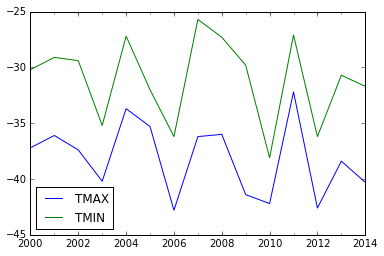

In [92]:
tmp_mm = tmp.resample("A", how=satardays)
tmp_mm['2000':].plot()

In [87]:
tmp_mm

,TMAX,TMIN
1891-01-31 00:00:00,NaN,NaN
1891-02-28 00:00:00,NaN,NaN
1891-03-31 00:00:00,NaN,NaN
1891-04-30 00:00:00,NaN,NaN
1891-05-31 00:00:00,NaN,NaN
1891-06-30 00:00:00,NaN,NaN
1891-07-31 00:00:00,NaN,NaN
...,...,...
2014-02-28,NaN,NaN
2014-03-31,NaN,NaN


That's it. I hope you at least get a rough impression of what pandas can do for you. Comments are very welcome (below). If you have intresting examples of pandas usage in Earth Science, we would be happy to put them on [EarthPy](http://earthpy.org).

## Links

[Time Series Data Analysis with pandas (Video)](http://www.youtube.com/watch?v=0unf-C-pBYE)

[Data analysis in Python with pandas (Video)](http://www.youtube.com/watch?v=w26x-z-BdWQ)

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)